In [12]:
from sqlalchemy import create_engine, Table, MetaData, Column, Float, String
import pandas as pd
import numpy as np
import sqlite3
import math
import statsmodels.api as sm
import os
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [13]:
"""
This code defines a class DataProcessor that creates and interacts with a SQLite database using the SQLAlchemy library.
The class has methods to create tables with specific columns in the database and to load data from CSV files into those tables.
The create_tables() method creates tables with specific columns for train, test, ideal, and mappings.
The load_data_to_table() method loads data from a CSV file into the specified table in the database. 
This method uses the pd.read_csv() function to read the CSV file and then uses the to_sql() method of the pandas
dataframe to insert the data into the database table.
"""
class DataProcessor:
    def __init__(self, db_name):
        self.engine = create_engine(f'sqlite:///{db_name}')
        self.metadata = MetaData(bind=self.engine)
        
    def create_tables(self):
        mytable = Table('train', self.metadata,
            Column('x', Float),
            Column('y1', Float),
            Column('y2', Float),
            Column('y3', Float),
            Column('y4', Float),
        )

        mytable = Table('test', self.metadata,
            Column('x', Float),
            Column('y', Float),
            )

        mytable = Table('ideal', self.metadata,
            Column('x', Float),
            Column('y1', Float),
            Column('y2', Float),
            Column('y3', Float),
            Column('y4', Float),
            Column('y5', Float),
            Column('y6', Float),
            Column('y7', Float),
            Column('y8', Float),
            Column('y9', Float),
            Column('y10', Float),
            Column('y11', Float),
            Column('y12', Float),
            Column('y13', Float),
            Column('y14', Float),
            Column('y15', Float),
            Column('y16', Float),
            Column('y17', Float),
            Column('y18', Float),
            Column('y19', Float),
            Column('y20', Float),
            Column('y21', Float),
            Column('y22', Float),
            Column('y23', Float),
            Column('y24', Float),
            Column('y25', Float),
            Column('y26', Float),
            Column('y27', Float),
            Column('y28', Float),
            Column('y29', Float),
            Column('y30', Float),
            Column('y31', Float),
            Column('y32', Float),
            Column('y33', Float),
            Column('y34', Float),
            Column('y35', Float),
            Column('y36', Float),
            Column('y37', Float),
            Column('y38', Float),
            Column('y39', Float),
            Column('y40', Float),
            Column('y41', Float),
            Column('y42', Float),
            Column('y43', Float),
            Column('y44', Float),
            Column('y45', Float),
            Column('y46', Float),
            Column('y47', Float),
            Column('y48', Float),
            Column('y49', Float),
            Column('y50', Float),
            )
        
    
        self.metadata.create_all(self.engine)
        
    def load_data_to_table(self, table_name, file_name):
        data = pd.read_csv(file_name)
        table = Table(table_name, self.metadata, autoload=True, autoload_with=self.engine)
        data.to_sql(table_name, self.engine, if_exists='replace', index=False)
        
        
    
"""
In the if __name__ == '__main__': block, an instance of the DataProcessor class is created, 
and its create_tables() and load_data_to_table() methods are called to create the necessary tables in the database 
and load data from the CSV files into those tables. The mappings table is loaded with data from the test.csv file, 
which might be an error as the mappings table is expected to have two columns (x and y) while the test.csv file might 
have more columns.
"""
        
if __name__ == '__main__':
    dp = DataProcessor('mydatabase.db')
    dp.create_tables()
    dp.load_data_to_table('train', 'train.csv')
    dp.load_data_to_table('test', 'test.csv')
    dp.load_data_to_table('ideal', 'ideal.csv')
    

In [14]:
"""
This function load_data_from_db(db_file) takes a string argument db_file representing 
the path to a SQLite database file. It attempts to establish a connection to the database and loads data from
three tables (named 'train', 'ideal', and 'test') into separate pandas DataFrames. If the function is unable to load data
or encounters an error, it will print a relevant error message.
"""
def load_data_from_db(db_file):
    try:
       
        #Create a connection to the SQLite database
        conn = sqlite3.connect(db_file) 

        # Load the train data into a DataFrame
        train_df = pd.read_sql_query("SELECT * FROM train", conn)
                           
        # Load the ideal functions into a DataFrame
        ideal_df = pd.read_sql_query("SELECT * FROM ideal", conn) 

        # Load the test functions into a DataFrame
        test_df =  pd.read_sql_query("SELECT * FROM test", conn) 

# Return the train, ideal, and test dataframe
        return train_df, ideal_df, test_df
    except sqlite3.Error as e:
        print(f"Error loading data from database: {e}")

# Call the function and handle exceptions if any
try:
    train_df, ideal_df, test_df = load_data_from_db('mydatabase.db')
except FileNotFoundError as e:
    print(f"Error loading data: {e}")
except pd.errors.EmptyDataError as e:
    print(f"Error loading data: {e}")
except Exception as e:
    print(f"Error: {e}")


In [15]:
# Understanding the data for insight

# Find number of rows and columns in train dataframe
print('No. of rows in train set are:' , train_df.shape[0])
print('No. of columns in train set are:', train_df.shape[1] , "\n")


# Find number of rows and columns in ideal dataframe
print('No. of rows in ideal set are:', ideal_df.shape[0])
print('No. of columns in ideal set are:', ideal_df.shape[1], "\n")

# Find number of rows and columns in test dataframe
print('No. of rows in test set are:', test_df.shape[0])
print('No. of columns in test set are:', test_df.shape[1], "\n")

#The statistical descripton of the dataset
print("The statistical description of the train data")
print(train_df.describe().T)
print("The statistical description of the test data ")
print(ideal_df.describe().T)
print("The statistical description of the test data ")
print(test_df.describe())


# The head of the three data set
print("The head of the train dataset")
print(train_df.head(3))
print("The head of the test dataset")
print(test_df.head(3))
print("The head of the ideal dataset")
print(ideal_df.head(3))




No. of rows in train set are: 400
No. of columns in train set are: 5 

No. of rows in ideal set are: 400
No. of columns in ideal set are: 51 

No. of rows in test set are: 100
No. of columns in test set are: 2 

The statistical description of the train data
    count       mean          std          min          25%        50%  \
x   400.0  -0.050000    11.561430   -20.000000   -10.025000  -0.050000   
y1  400.0  11.931778     1.839565   -18.773504    11.557280  12.256021   
y2  400.0  -0.055629    11.570018   -20.239315    -9.968035  -0.001088   
y3  400.0 -20.071336  3038.163704 -8020.191400 -1017.752875   0.075906   
y4  400.0   4.231240     1.845582   -26.761507     3.869661   4.539468   

           75%          max  
x     9.925000    19.900000  
y1   12.731374    13.382447  
y2    9.885762    20.095798  
y3  987.444608  7900.065400  
y4    5.012739     5.734252  
The statistical description of the test data 
     count          mean          std           min          25%  \
x  

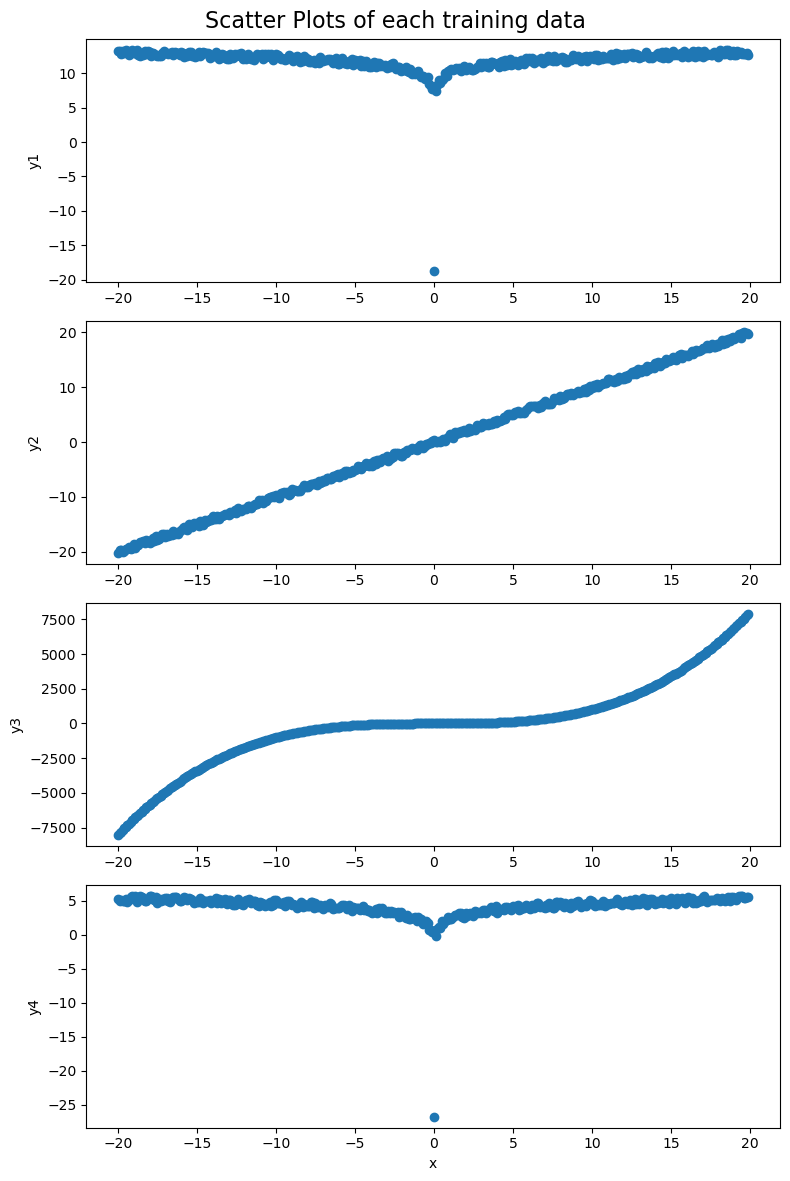

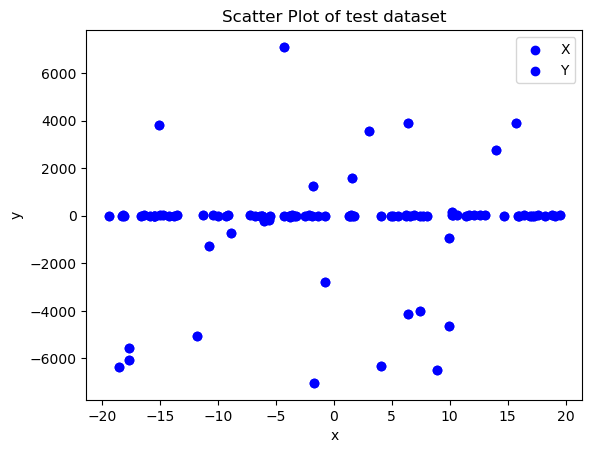

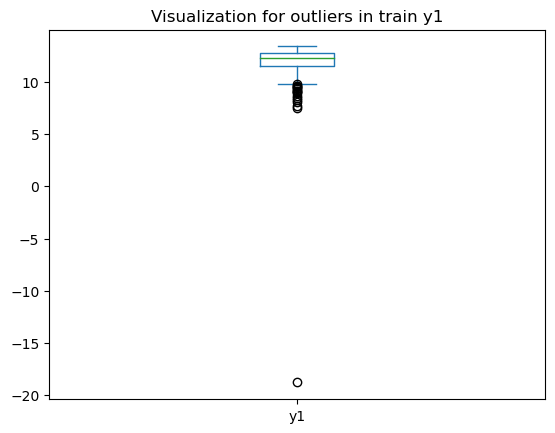

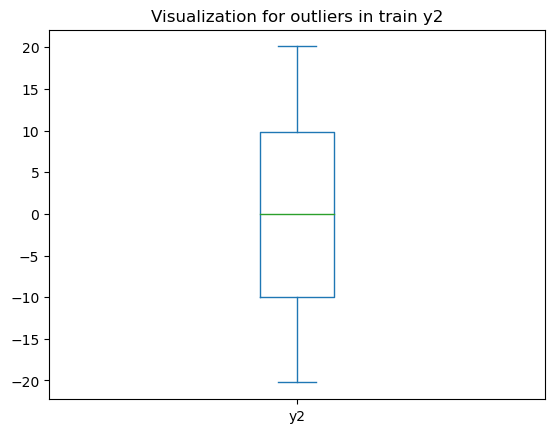

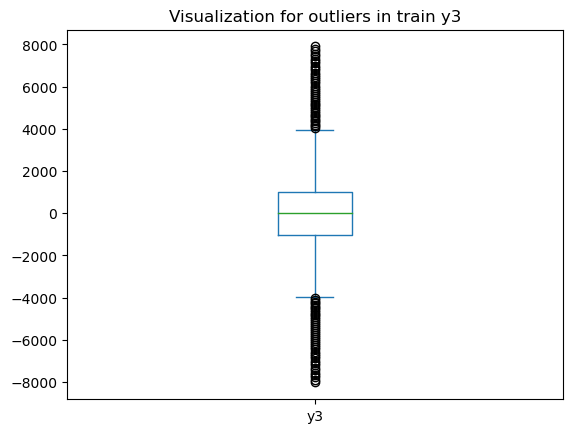

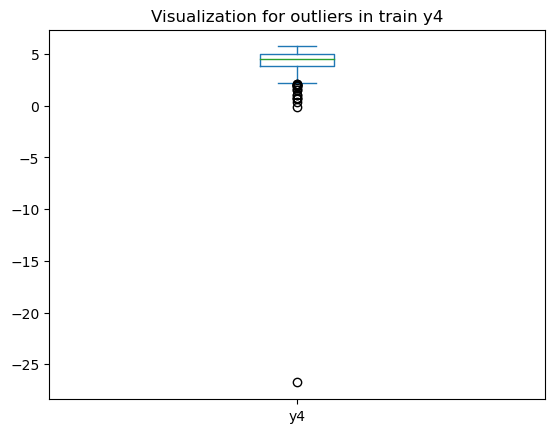

In [16]:
# Visualization of the dataset for insight

class visulization:
    #scatterplot to observe the distribution of the train x and Ys
    def train(train_dt):
        x_value = train_df['x']
        y1_value = train_df['y1']
        y2_value = train_df['y2']
        y3_value = train_df['y3']
        y4_value = train_df['y4']

        # Create a 4x1 grid of subplots
        fig, axs = plt.subplots(4, 1, figsize=(8, 12))

        # Scatter plot for train y1
        axs[0].scatter(x_value, y1_value, label='y1')
        axs[0].set_ylabel('y1')

        # Scatter plot for y2
        axs[1].scatter(x_value, y2_value, label='y2')
        axs[1].set_ylabel('y2')

        # Scatter plot for y3
        axs[2].scatter(x_value, y3_value, label='y3')
        axs[2].set_ylabel('y3')

        # Scatter plot for y4
        axs[3].scatter(x_value, y4_value, label='y4')
        axs[3].set_ylabel('y4')

        # Add labels and title to the whole figure
        fig.suptitle('Scatter Plots of each training data', fontsize=16)
        plt.xlabel('x')

        # Adjust spacing between subplots
        plt.tight_layout()

        # Display the plot
        plt.show()

    train(train_df)
    
    def test(test_df):
        # Create a scatter plot
        plt.scatter(test_df['x'], test_df['y'], label='X', color='blue')

        # Create a scatter plot for y with a different color
        plt.scatter(test_df['x'], test_df['y'], label='Y', color='blue')
       

        # Add labels and title
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Scatter Plot of test dataset')

        # Add legend
        plt.legend()

        # Display the plot
        plt.show()
    test(test_df)
    
     #Look for outliers in the datasets

    def outliers_in_train():
    # Iterate over each column in the train_dt DataFrame
        for column in train_df.columns[1:]:
        # Create a boxplot for the current column
            train_df[column].plot(kind='box')
        # Set the title for the current column
            plt.title("Visualization for outliers in train "+ column)
        # Show the plot for the current column
            plt.show()
    outliers_in_train()

    
    
    


In [17]:
"""
Calculates the minimum deviations between train_df and ideal_df.
and Returns a Dictionary containing the minimum deviations and their labels.
"""

def calculate_deviations(train_df, ideal_df):
    deviations = {}

    for train_set_label, train_set_df in train_df.drop('x', axis=1).items():
        for function_label, ideal_set_df in ideal_df.drop('x', axis=1).items():
            deviation = ((train_set_df - ideal_set_df) ** 2).sum()

            if train_set_label not in deviations or deviation < deviations[train_set_label][0]:
                deviations[train_set_label] = (deviation, function_label)

    min_deviations = {train_set_label: (deviation, function_label) for train_set_label, (deviation, function_label) in deviations.items()}
    return min_deviations

result = calculate_deviations(train_df, ideal_df)

print(result)

{'y1': (33.11923240552669, 'y45'), 'y2': (30.13582953647488, 'y11'), 'y3': (34.66534615119008, 'y28'), 'y4': (30.431761446317186, 'y46')}


In [18]:
def calculate_max_deviation(train_df, ideal_df, train_column, ideal_column):
    train_data = train_df[train_column]
    ideal_data = ideal_df[ideal_column]
    max_dev_allowed = np.max(np.abs(train_data - ideal_data)) * np.sqrt(2)
    return max_dev_allowed


variables = [('y1', 'y45'), ('y2', 'y11'), ('y3', 'y28'), ('y4', 'y46')]

for train_col, ideal_col in variables:
    max_dev_allowed = calculate_max_deviation(train_df, ideal_df, train_col, ideal_col)
    print(f"Maximum deviation allowed for {train_col} variable is {max_dev_allowed}")


Maximum deviation allowed for y1 variable is 0.7069894014608705
Maximum deviation allowed for y2 variable is 0.7046403927337683
Maximum deviation allowed for y3 variable is 0.7048440394866755
Maximum deviation allowed for y4 variable is 0.7022362296777346


In [19]:
"""This function merge the test dataset and the four ideal function that are
the best fit out of the fifty."""

def test_ideal_deviations(test_df, ideal_df):
    test_row = []
     
    # Read the test file line by line via open()
    with open("test.csv", "r") as f:
        reader = csv.reader(f)
        next(reader)
        for row in reader:
            test_row.append(row)

    # Create a dataframe that stores each row
    new_test_df = pd.DataFrame(test_row, columns=["x", "y"])
    new_test_df["x"] = new_test_df["x"].astype(float)
    new_test_df["y"] = new_test_df["y"].astype(float)
    #Merge the four ideals with the created dataframe
    
    
    chosen_ideal_df1 = new_test_df.merge(ideal_df, on='x')
    dev1 = chosen_ideal_df1.apply(lambda row: row['y'] - row['y45'], axis=1)
    dev2 = chosen_ideal_df1.apply(lambda row: row['y'] - row['y11'], axis=1)
    dev3 = chosen_ideal_df1.apply(lambda row: row['y'] - row['y28'], axis=1)
    dev4 = chosen_ideal_df1.apply(lambda row: row['y'] - row['y46'], axis=1)

    chosen_ideal_df = pd.concat({
        'x': chosen_ideal_df1['x'],
        'y': chosen_ideal_df1['y'],
        'y45': dev1,
        'y11': dev2,
        'y28': dev3,
        'y46': dev4
    }, axis=1)
    
    
    
    return chosen_ideal_df
chosen_ideal_df = test_ideal_deviations(test_df, ideal_df)
 


In [20]:
"""The function iterates through each row of chosen_ideal_df, each row represents an ideal function.
For each ideal function, it find the deviations between the ideal function's y value and its corresponding deviation columns.
It then finds the minimum deviation and its corresponding ideal function label.
The maximum allowed deviation for mapping is calculated using the calculate_max_deviation function.
If the minimum deviation is within the specified criteria, a mapping entry is created and added to the mapped_points list.
Finally, the list of mapping entries is converted into a pandas DataFrame (mapped_df) and returned
"""

def mapping_points(test_df, chosen_ideal_df):
    mapped_points = []
    
    for index, row in chosen_ideal_df.iterrows():
        x_val, y_val = row["x"], row["y"]

        deviations = {}
        min_deviations = []

        for ideal_func_label in chosen_ideal_df.columns[2:]:
            deviation = abs(y_val - row[ideal_func_label])
            deviations[ideal_func_label] = deviation
            min_deviations.append(deviation)

        min_deviation = min(min_deviations)
        chosen_ideal_label = min(deviations, key=deviations.get)
        
        max_deviation = calculate_max_deviation(test_df, chosen_ideal_df, "y", chosen_ideal_label)

        if min_deviation <= math.sqrt(2) * max_deviation:
            mapping = {"x": x_val, "y": y_val, "delta_y_test": min_deviation, "no_of_ideal": chosen_ideal_label}
            mapped_points.append(mapping)
            
    mapped_df = pd.DataFrame(mapped_points)
    return mapped_df


chosen_ideal_df = test_ideal_deviations(test_df, ideal_df)
mapped_points = mapping_points(test_df, chosen_ideal_df)
print("chosen_ideal_fun")
print(chosen_ideal_df)
print("Mapped points:")
print(mapped_points)


chosen_ideal_fun
       x            y          y45          y11          y28          y46
0   -1.8  1244.551500  1233.963713  1246.351500  1252.183500  1241.661128
1   14.0  2757.597400  2744.958343  2743.597400    -0.402600  2752.655758
2  -19.4     5.082344    -7.882929    24.482344  7325.866344    -0.185514
3   -6.2     3.963484    -7.861066    10.163484   248.491484    -0.163651
4   -6.2    -6.424840   -18.249389    -0.224839   238.103161   -10.551974
..   ...          ...          ...          ...          ...          ...
95   1.3     2.929756    -7.332608     1.629756    -0.567244     0.364806
96 -18.3     4.145028    -8.761873    22.445028  6150.932028    -1.064458
97  -6.4    -6.163825   -18.020123     0.236175   262.380175   -10.322708
98   8.0     4.562299    -7.517142    -3.437701  -515.437701     0.180273
99  12.6    11.833786    -0.699911    -0.766214 -2001.142214     6.997504

[100 rows x 6 columns]
Mapped points:
       x            y  delta_y_test no_of_ideal
0   -1.8

In [ ]:
"""This function creates the mapping table and insert the mapped_df into the mapping table 
within the sqlite database."""

def create_mapping_table(metadata, engine):
    mapping_table = Table('mapping', metadata,
        Column('X', Float),
        Column('Y', Float),
        Column('delta_y_test', Float),
        Column('no_of_ideal', Float),
    )
    metadata.create_all(engine)

def insert_mapped_data_to_mapping_table(engine, mapped_df):
    mapping_table = Table('mapping', MetaData(bind=engine), autoload=True, autoload_with=engine)
    mapped_df.to_sql(mapping_table.name, engine, if_exists='replace', index=False)

# existing DataProcessor class code

if __name__ == '__main__':
    dp = DataProcessor('mydatabase.db')
    dp.create_tables()
    dp.load_data_to_table('train', 'train.csv')
    dp.load_data_to_table('test', 'test.csv')
    dp.load_data_to_table('ideal', 'ideal.csv')

    chosen_ideal_df = test_ideal_deviations(test_df, ideal_df)
    mapped_points = mapping_points(test_df, chosen_ideal_df)

    # Create the mapping table 
    create_mapping_table(dp.metadata, dp.engine)

    # Insert mapped data into the mapping table
    insert_mapped_data_to_mapping_table(dp.engine, mapped_points)


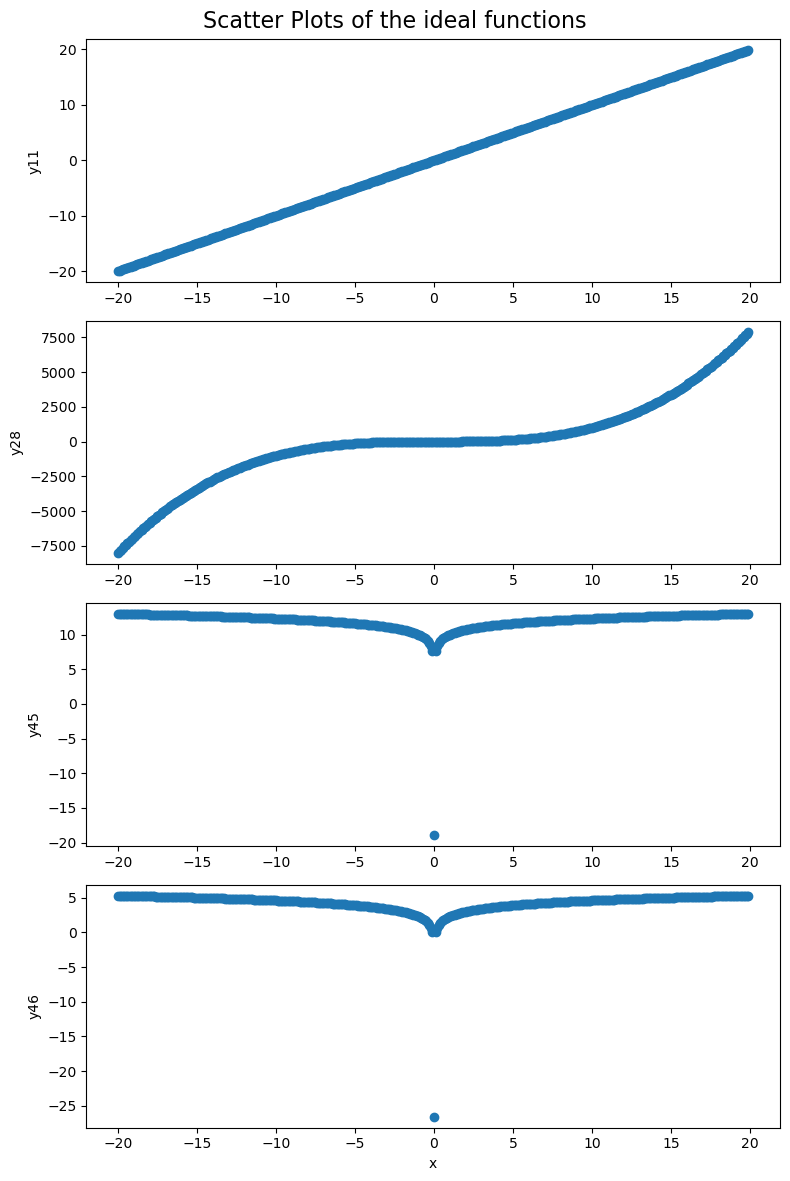

In [10]:
"""Visualization of the four ideal functions that were chosen"""
def chosen_ideals(ideal_df):
        x_value = ideal_df['x']
        y45_value = ideal_df['y45']
        y11_value = ideal_df['y11']
        y28_value = ideal_df['y28']
        y46_value = ideal_df['y46']

        # Create a 4x1 grid of subplots
        fig, axs = plt.subplots(4, 1, figsize=(8, 12))
        
        # Scatter plot for y1
        axs[2].scatter(x_value, y45_value, label='y45')
        axs[2].set_ylabel('y45')

        # Scatter plot for y2
        axs[0].scatter(x_value, y11_value, label='y11')
        axs[0].set_ylabel('y11')

        # Scatter plot for y3
        axs[1].scatter(x_value, y28_value, label='y28')
        axs[1].set_ylabel('y28')
    

        # Scatter plot for y4
        axs[3].scatter(x_value, y46_value, label='y46')
        axs[3].set_ylabel('y46')

        # Add labels and title to the whole figure
        fig.suptitle('Scatter Plots of the ideal functions', fontsize=16)
        plt.xlabel('x')

        # Adjust spacing between subplots
        plt.tight_layout()

        # Display the plot
        plt.show()

chosen_ideals(ideal_df)
    



Mean Squared Error (MSE): 18.477551654866918
Root Mean Squared Error (RMSE): 4.29855227429735
None
Mean Absolute Error (MAE): 4.137237316999995
R-squared: 0.9999957904668163
Mapped points:
       x            y  delta_y_test no_of_ideal
0   -1.8  1244.551500      1.800000         y11
1   14.0  2757.597400      4.941642         y46
2  -19.4     5.082344      5.267858         y46
3   -6.2     3.963484      4.127134         y46
4   -6.2    -6.424840      4.127134         y46
..   ...          ...           ...         ...
95   1.3     2.929756      1.300000         y11
96 -18.3     4.145028      5.209486         y46
97  -6.4    -6.163825      4.158883         y46
98   8.0     4.562299      4.382027         y46
99  12.6    11.833786      4.836282         y46

[100 rows x 4 columns]


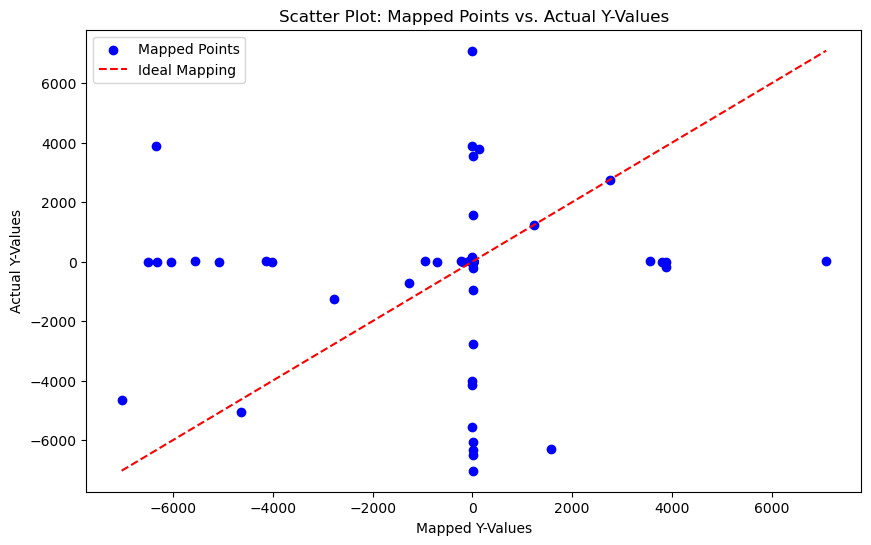

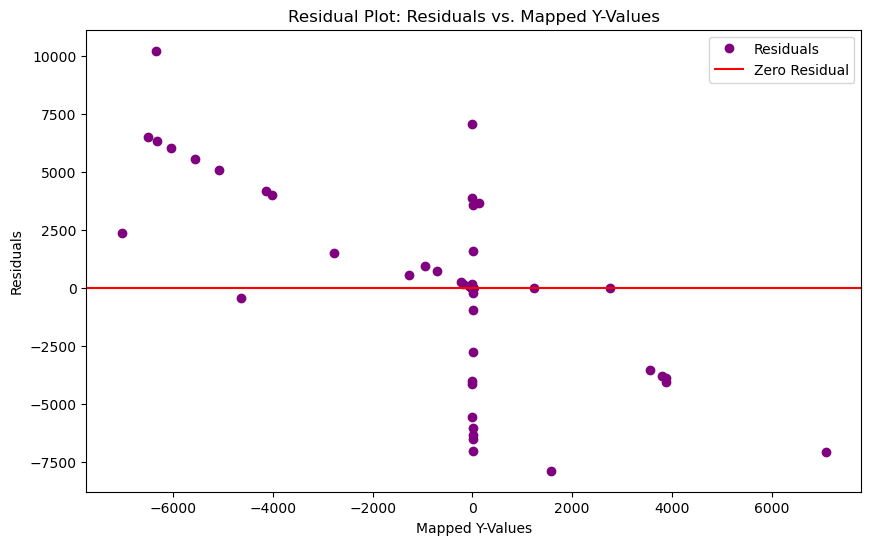

In [27]:

"""This code is used to check the performance of the model outcome using few metrics, and their visualization"""
chosen_ideal_df = test_ideal_deviations(test_df, ideal_df)
mapped_points = mapping_points(test_df, chosen_ideal_df)

# Calculate the actual y-values for the chosen ideal functions
actual_ys = [chosen_ideal_df.loc[i, mapped_points.loc[i, 'no_of_ideal']] for i in mapped_points.index]

residuals = mapped_points["delta_y_test"] - (mapped_points["y"] - test_df["y"])

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(mapped_points['y'], actual_ys)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print(print("Root Mean Squared Error (RMSE):", rmse))
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(mapped_points['y'], actual_ys)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared
r2 = r2_score(mapped_points['y'], actual_ys)
print("R-squared:", r2)

print("Mapped points:")
print(mapped_points)

# Scatter Plot: Mapped Points vs. Actual Y-Values

plt.figure(figsize=(10, 6))
plt.scatter(mapped_points["y"], test_df["y"], label="Mapped Points", color="blue")
plt.plot([min(mapped_points["y"]), max(mapped_points["y"])], [min(mapped_points["y"]), max(mapped_points["y"])], color='red', linestyle='--', label="Ideal Mapping")
plt.xlabel("Mapped Y-Values")
plt.ylabel("Actual Y-Values")
plt.title("Scatter Plot: Mapped Points vs. Actual Y-Values")
plt.legend()
plt.show()

# Residual Plot: Residuals vs. Mapped Y-Values
plt.figure(figsize=(10, 6))
plt.plot(mapped_points["y"], residuals, marker='o', linestyle='None', label="Residuals", color="purple")
plt.axhline(y=0, color='r', linestyle='-', label="Zero Residual")
plt.xlabel("Mapped Y-Values")
plt.ylabel("Residuals")
plt.title("Residual Plot: Residuals vs. Mapped Y-Values")
plt.legend()
plt.show()
